# 0.0. IMPORTS

In [1]:
import pandas as pd
import inflection
import math
import seaborn as sns
import numpy as np

import datetime
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

# 1.0 - Módulo 02 - Passo 01 -  Descrição dos Dados

 O quão DESAFIADOR é o problema que estou lidando?

## O quão Desafiador é o problema?

 - Quantidade de Dados:
   - Eu tenho os recursos corretos para trabalhar?
     - Servidores? Clusters? Spark? Hadoop?
 
 - Tipos de Variáveis:
   - QUais os tipos de variáveis?
     - % Numérica, % Categórica, % Temporal.
     
 - Quantidade de Dados Faltante:
   - Qual o volume de dados NA?
   - Qual a razão de faltar dados?
     - SIstema? Input Manual?
 - Resumo geral dos Dados:
     - Estatística Descritiva.

## Store Sales Predction

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading data

In [4]:
pwd

'C:\\Users\\Agilize\\Documents\\repos\\comunidade_ds\\4 - DS em Produção\\Módulo 04 - Análise Exploratória de Dados'

In [5]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('data/store.csv', low_memory = False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

## 1.0. DESCRICAO DOS DADOS

In [6]:
df1 = df_raw.copy()

### 1.1. Rename Columns

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',             'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2',                         'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list( map( snakecase, cols_old) )

# rename

df1.columns = cols_new

## 1.2. Data Dimensions

In [8]:
print( 'Number of Rows : {}'.format( df1.shape[0]))
print( 'Number of Cols : {}'.format( df1.shape[1]))

Number of Rows : 1017209
Number of Cols : 18


## 1.3. Data Types

In [9]:
df1['date']= pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [11]:
df1['competition_distance'].max()

75860.0

In [12]:
#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year 
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
                          
#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#promo_interval
month_map = {1:  'Jan', 2:'Fev',3:'Mar',4:'Apr',5:  'May', 6:  'Jun', 7:  'Jul', 8:  'Auh', 9:  'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0,axis=1 )

In [13]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [14]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [15]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int)

In [16]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical

In [17]:
num_attributes = df1.select_dtypes(include = ['int64','int32','float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64','int32','float64','datetime64[ns]'])

### 1.7.1 Numerical Attributes  

In [18]:
# Central Tendency - meam, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame(num_attributes.apply( min ) ).T
d3 = pd.DataFrame(num_attributes.apply( max ) ).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T

#concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ( ['attributes','min','max','range','mean','median','std','skew','kutosis'])

C:\Users\Agilize\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

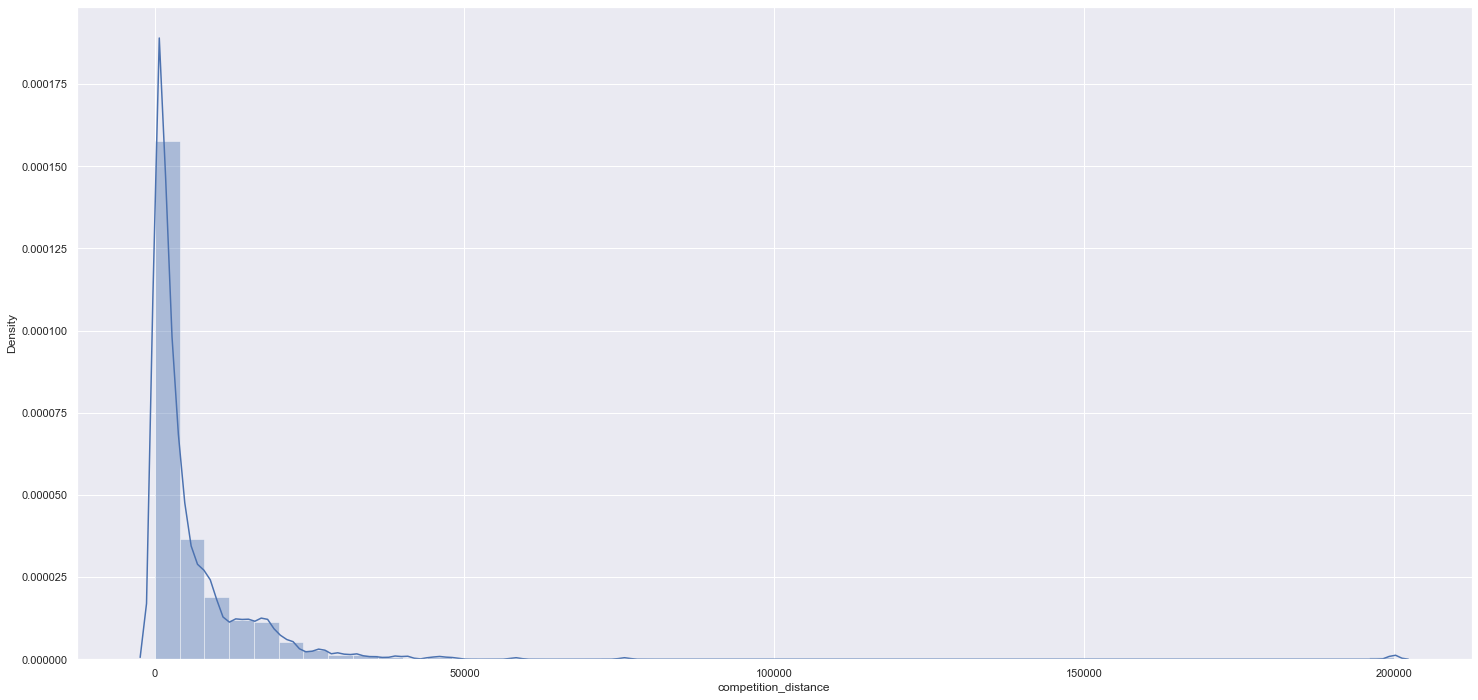

In [19]:
sns.distplot (df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [20]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

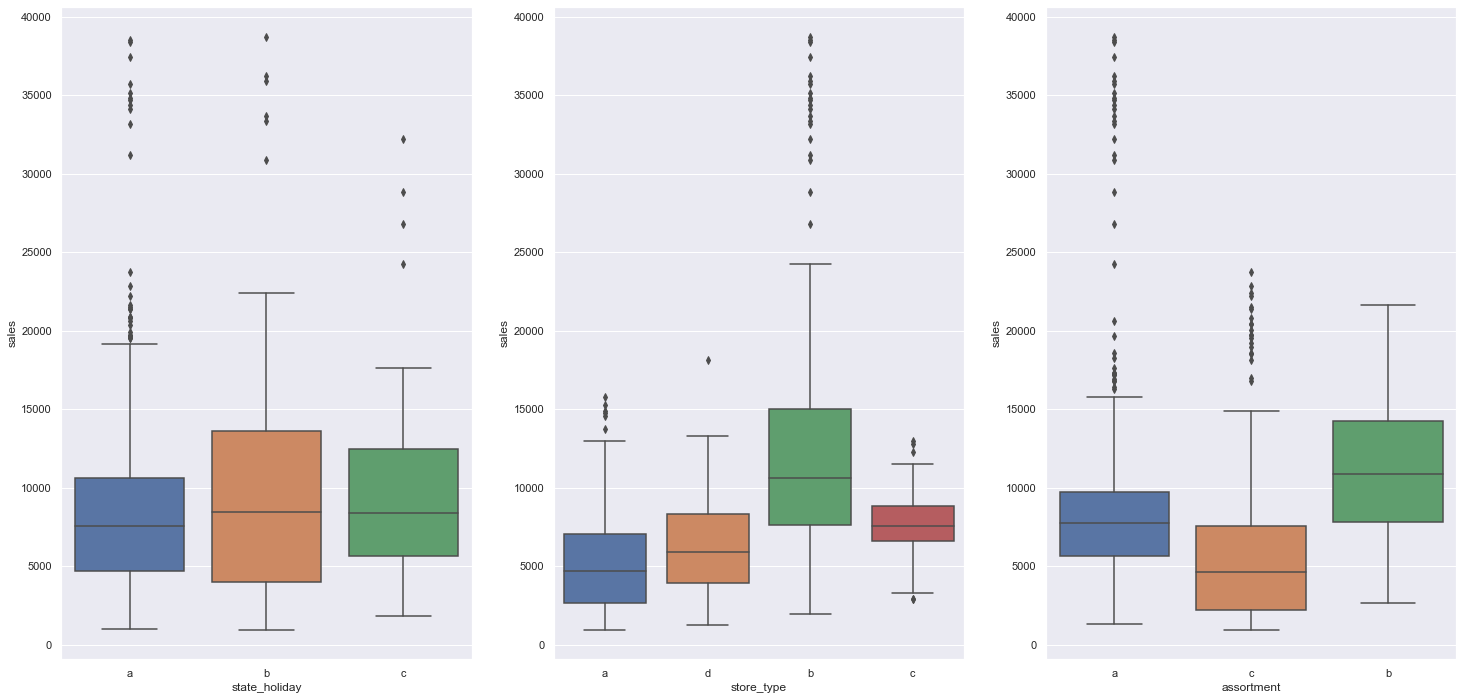

In [21]:

aux1 = df1[(df1['state_holiday'] !='0' ) & (df1['sales'] > 0 )]
plt.subplot( 1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data= aux1)

plt.subplot( 1, 3, 2)
sns.boxplot( x='store_type', y='sales', data= aux1)

plt.subplot( 1, 3, 3)
sns.boxplot( x='assortment', y='sales', data= aux1)

# 2.0 - Módulo 03 - Passo 02 - Feature Engineering

In [22]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipóteses

In [23]:
Image('img/MindMapHypothesis.png')

FileNotFoundError: No such file or directory: 'img/MindMapHypothesis.png'

FileNotFoundError: No such file or directory: 'img/MindMapHypothesis.png'

<IPython.core.display.Image object>

## 2.2 Criacao das Hipoteses

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2 Hipoteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3 Hipoteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Lista Final de hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.4. Feature Engineering

In [24]:
# year
df2['year'] = df2['date'].dt.year
               
# month 
df2['month'] = df2['date'].dt.month              
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear             
# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')
                                           
# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ), axis=1 )

df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype( str )

df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime( x+ '-1', '%Y-%W-%w') - datetime.timedelta( days=7) )

df2['promo_time_week'] = (( df2['date'] - df2['promo_since'])/7 ).apply( lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x=='a' else 'extra' if x=='b' else 'extended')

## state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x== 'a' else 'easter_holiday' if x=='b' else 'christimas' if x=='c' else 'regular day')

C:\Users\Agilize\AppData\Local\Temp/ipykernel_2948/1948508314.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


# 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [25]:
df3 = df2.copy()

In [26]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1. Filtragem das Linhas

In [27]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2. Seleção das Colunas

In [28]:
cols_drop = ["customers", 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis = 1)

In [29]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0. PASSO 04 - ANÁLISE EXPLORATÓRIA DOS DADOS

In [30]:
df4 = df3.copy()

In [31]:
%matplotlib inline
%pylab inline
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24

Populating the interactive namespace from numpy and matplotlib


## A Motivação da Análise

 Como as variáveis impactam o fenômeno? E QUal a força desse impacto?

### Quais os 3 Objetivos da EDA?

1. Ganhar experiência de Negócio

2. Validar Hipóteses de Negócio. ( Insights )

3. Perceber Variáveis que são importantes para o Modelo.

## Análise Exploratória de Dados ( EDA )

### Análise Univariada:

- Como é essa variável?
(Min, Max, Distribuição, Range,...)

### Análise Bivariada:

- Como a variável impacta na resposta?
  ( Correlação, Validação das Hipóteses,...)

### Análise Multivariada:

- Como as variáveis se relacionam?

## 4.1. Análise Univariada

### 4.1.1 Variável Resposta

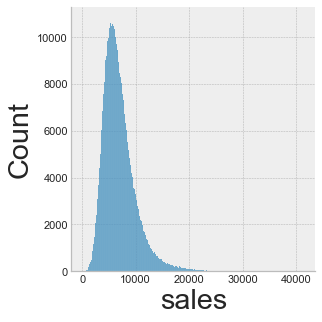

In [32]:
sns.displot(df4['sales'])

### 4.1.2 Variável Numerica 

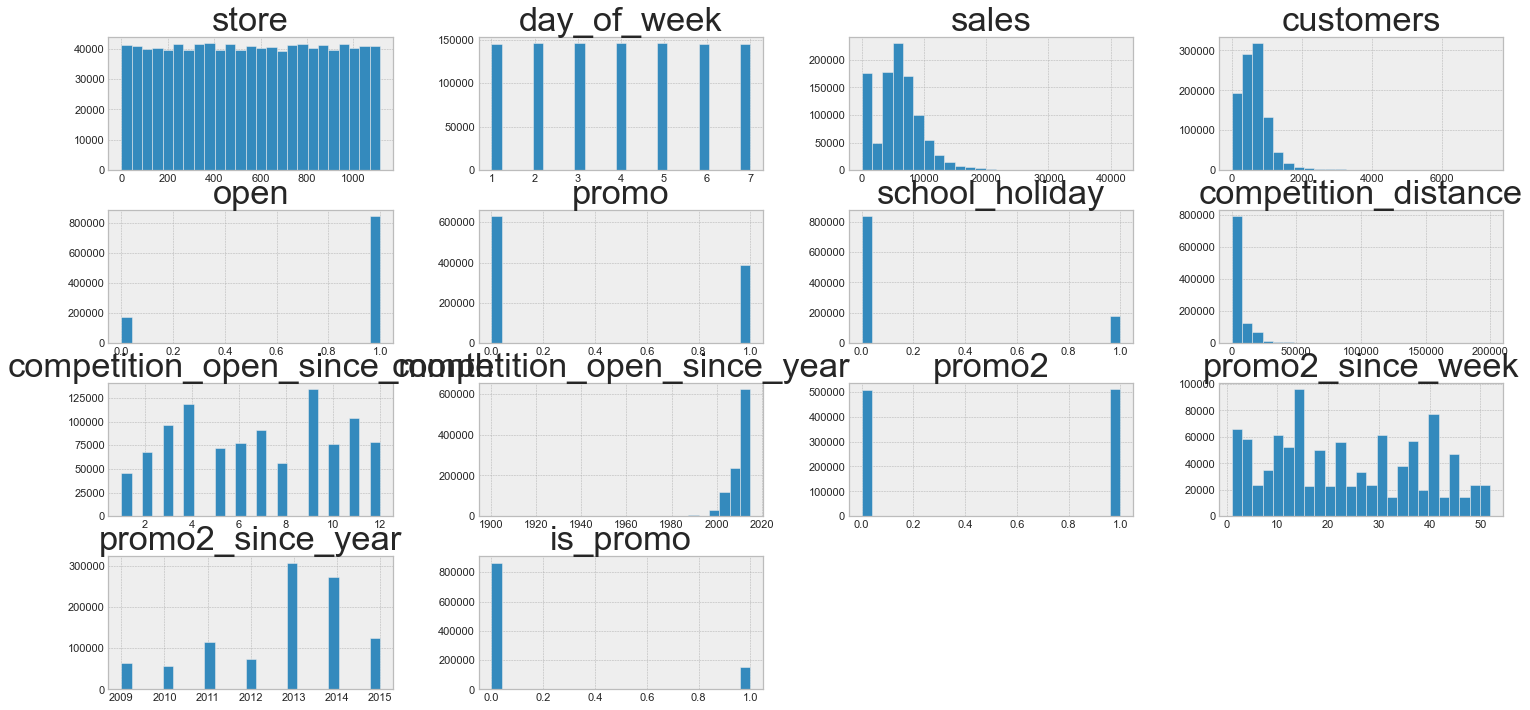

In [33]:
num_attributes.hist(bins = 25 );

### 4.1.1 Variável Categorica

In [34]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

C:\Users\Agilize\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Agilize\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Agilize\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

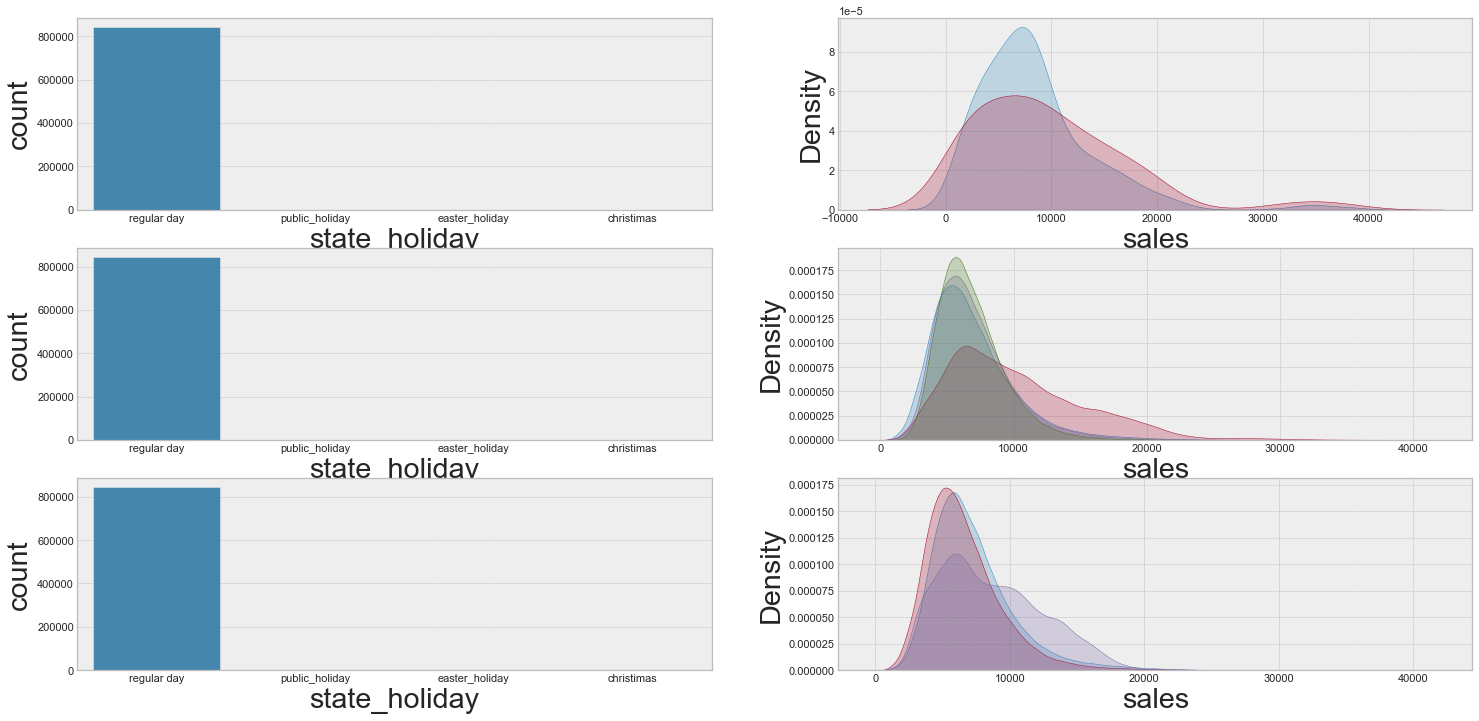

In [35]:
# state holiday
plt.subplot(3,2,1)
a = df4[df4['state_holiday'] !='regular_day']
sns.countplot(a['state_holiday'])


plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday',shade = True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday',shade = True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas',shade = True)

# store_type
plt.subplot(3,2,3)
sns.countplot(df4['state_holiday'])


plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'a',shade = True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'b',shade = True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'c',shade = True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'd',shade = True)


# assortment
plt.subplot(3,2,5)
sns.countplot(df4['state_holiday'])


plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended',shade = True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label = 'basic',shade = True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra',shade = True)


## 4.2. Análise Bivariada

### **H1.** Lojas com maior sortimentos deveriam vender mais.

**FALSA**  Lojas com MAIOR SORTIMETNO  vendem MENOS

<AxesSubplot:xlabel='year_week'>

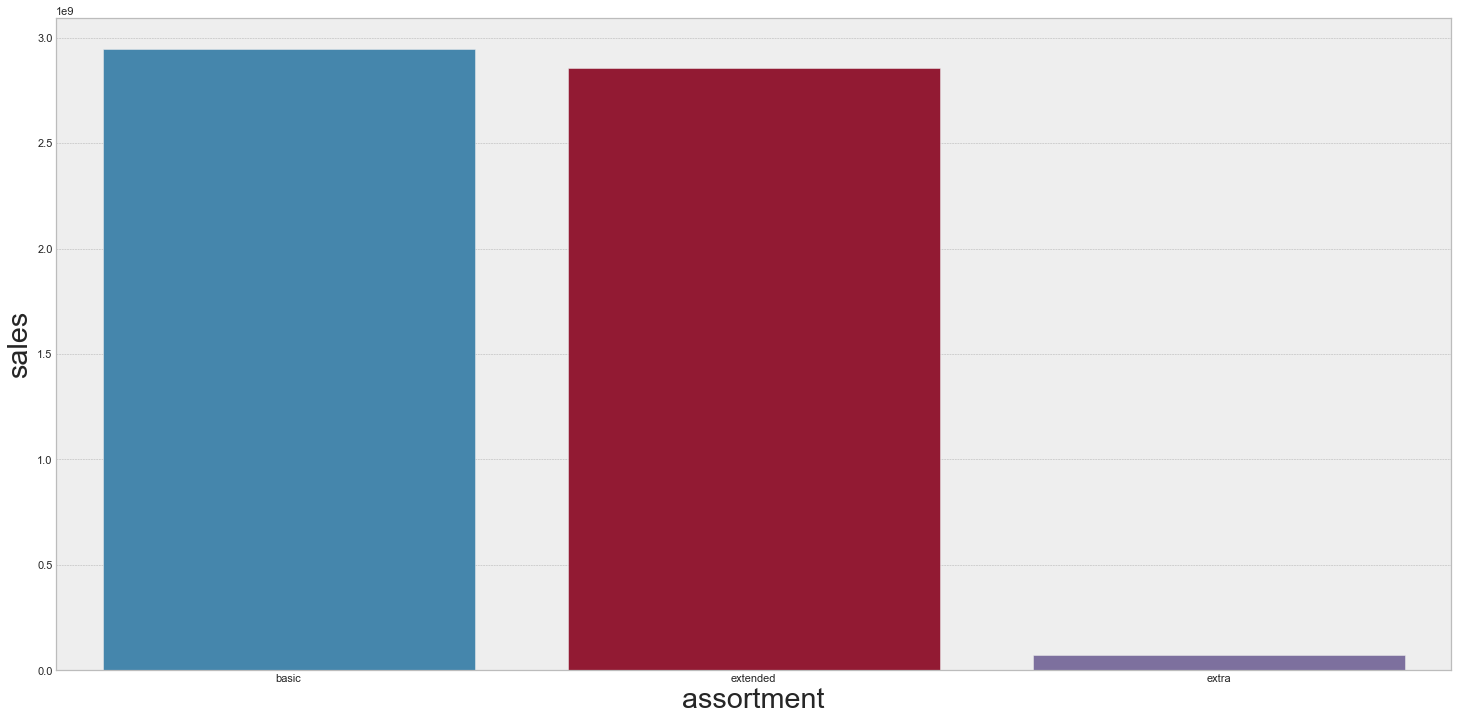

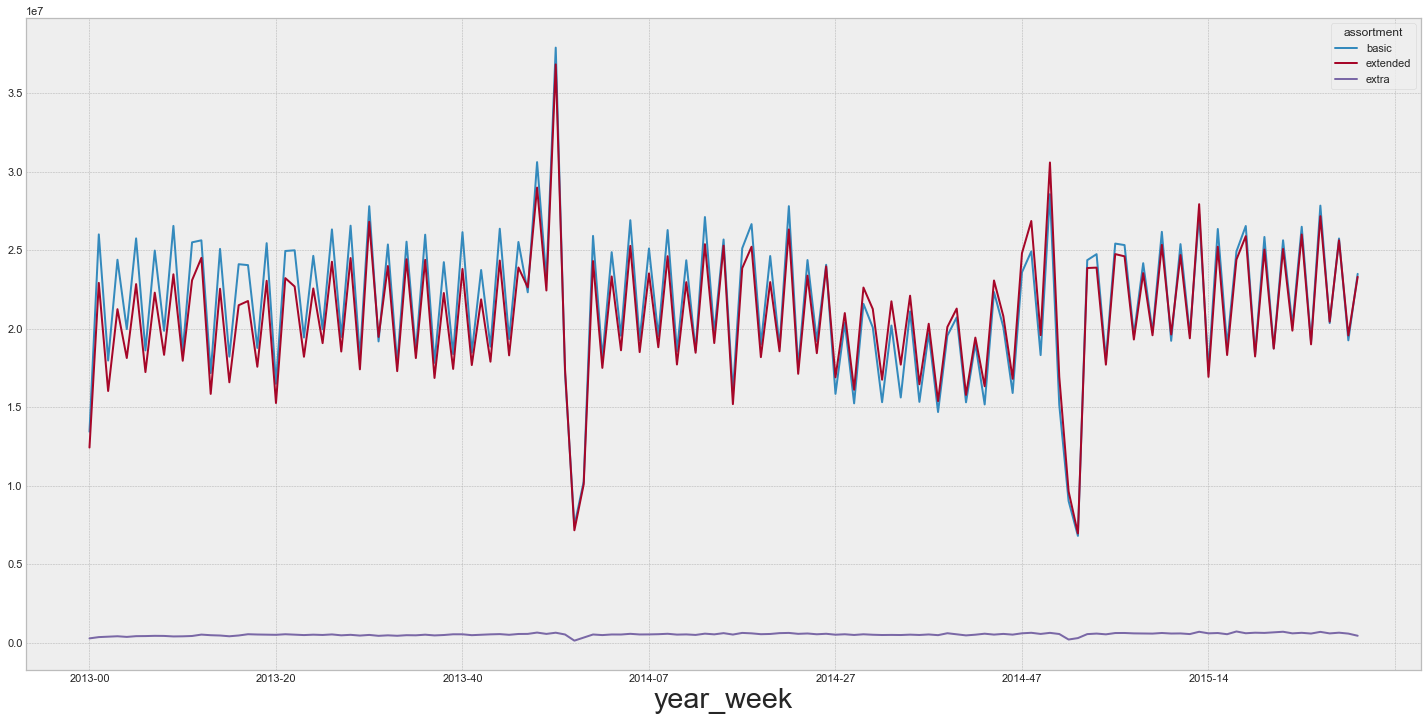

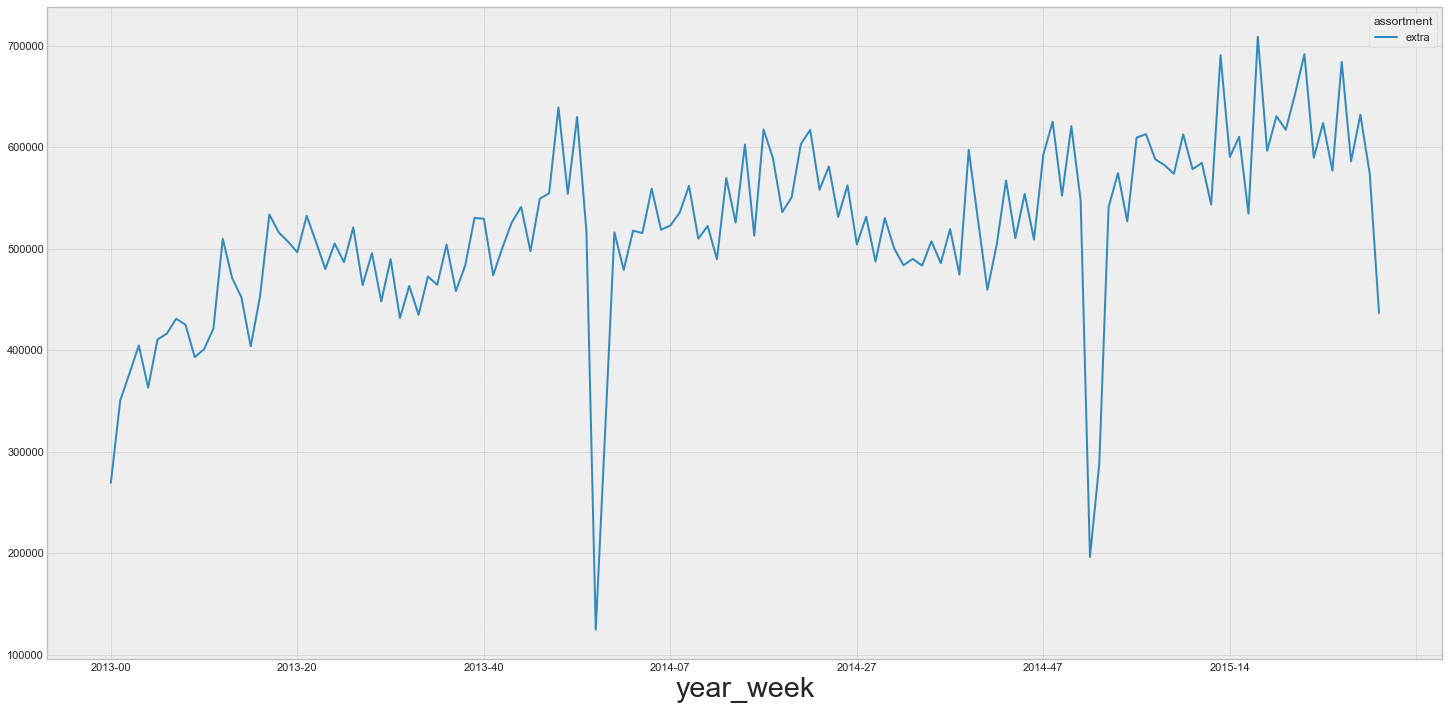

In [36]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment').sum().reset_index()
sns.barplot(x='assortment',y='sales',data=aux1);


aux2 = df4[['year_week','assortment', 'sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
aux2.pivot( index='year_week',columns='assortment',values='sales').plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week',columns='assortment',values='sales').plot()

### **H2.** Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com competidores mais proximos vendem MAIS.



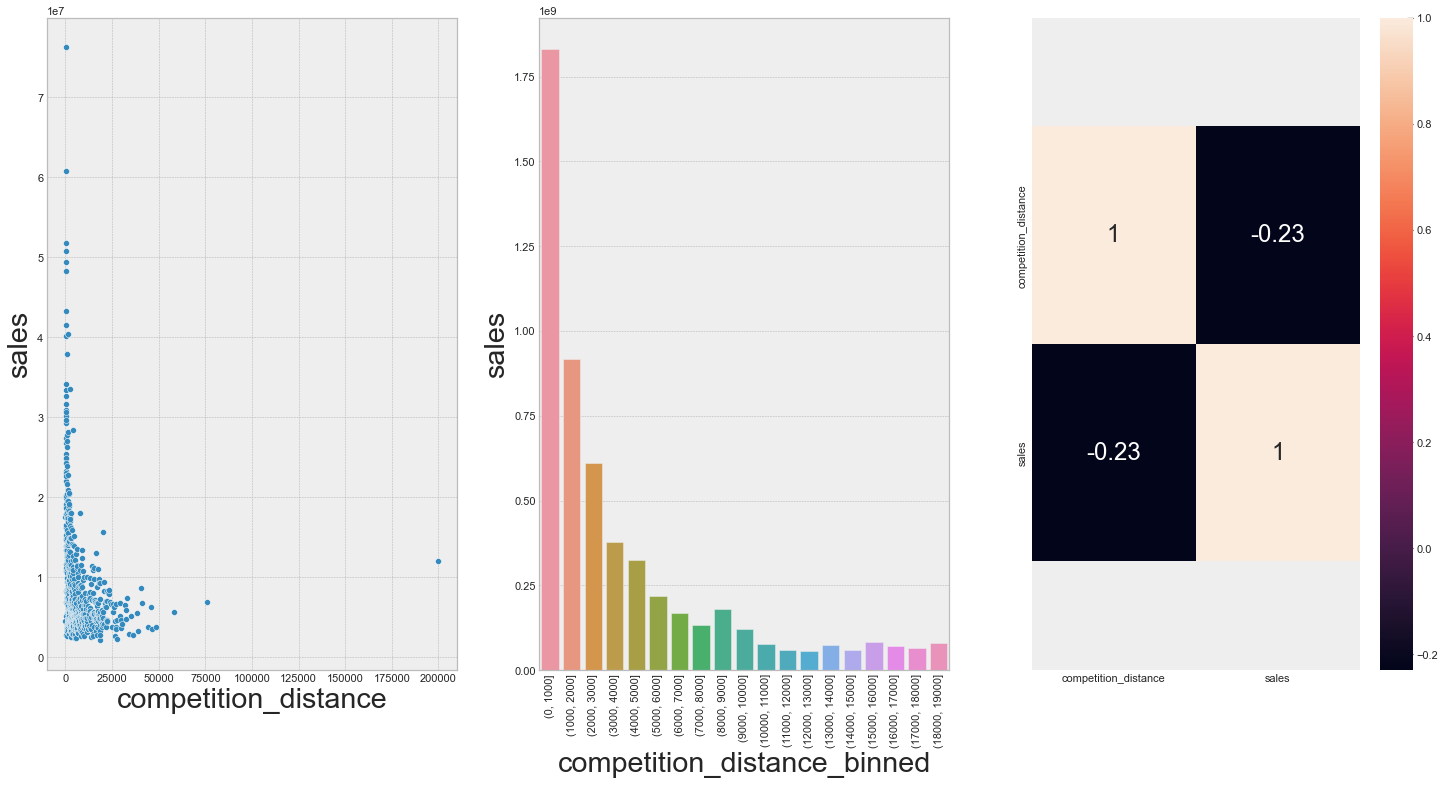

In [37]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()


plt.subplot( 1, 3, 1 )
sns.scatterplot(x = 'competition_distance', y='sales', data=aux1);

plt.subplot( 1, 3, 2 )
bins = list( np.arange(0,20000,1000))
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot( x='competition_distance_binned',y='sales', data=aux2 );
plt.xticks(rotation=90);

plt.subplot( 1, 3, 3 )
x = sns.heatmap(aux1.corr(method='pearson'), annot=True);
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

### **H3.** Lojas com competidores à mais tempo deveriam vendem mais.
**FALSA** Lojas com competidores a mais tempo vendem menos.

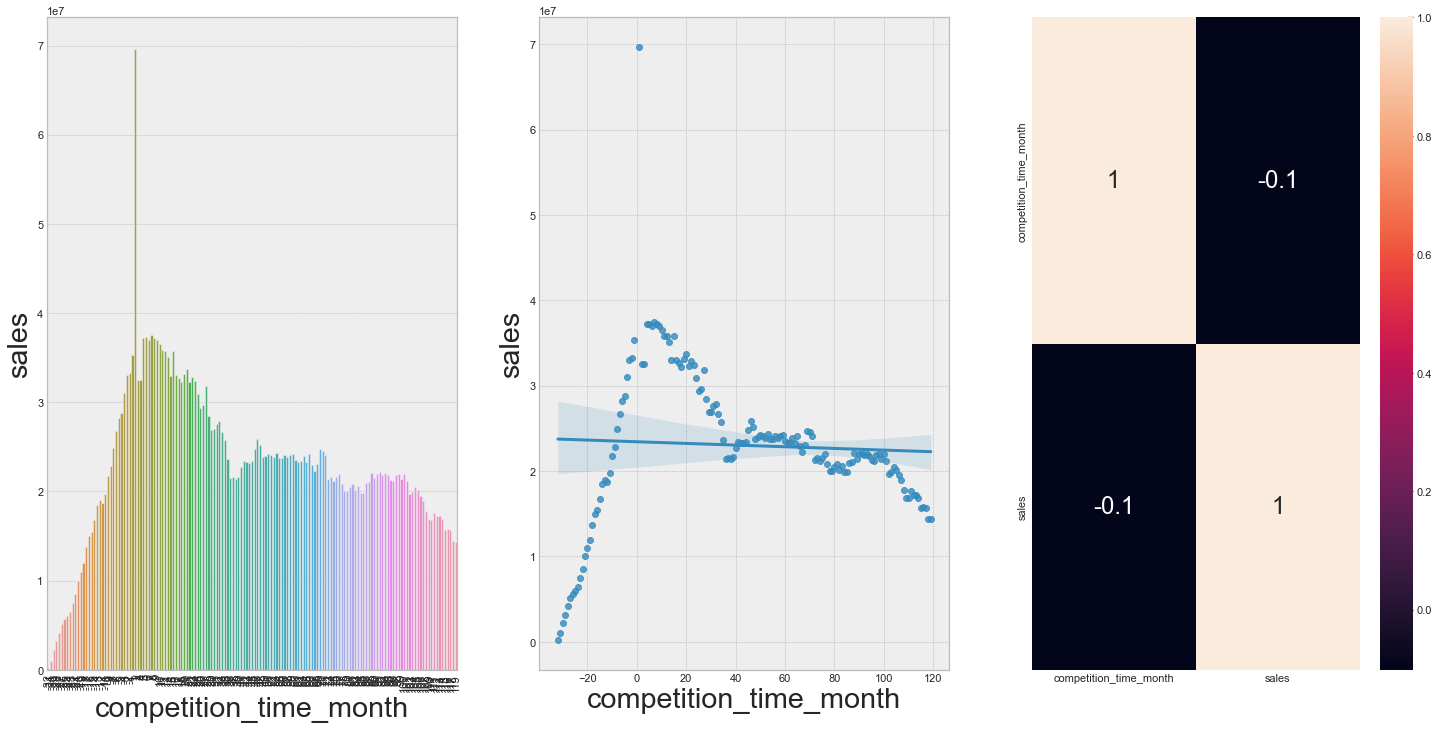

In [38]:
plt.subplot(1,3,1)
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )]
sns.barplot(x='competition_time_month',y='sales',data=aux2 );
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sns.regplot(x='competition_time_month',y='sales',data=aux2 );

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson'), annot=True);
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0,5);

### **H4.** Lojas com promoções ativas por mais tempo deveriam vender mais.
**FALSA** Lojas com promocoes ativas por mais tempo vendem menos, depois de um certo período de promocao




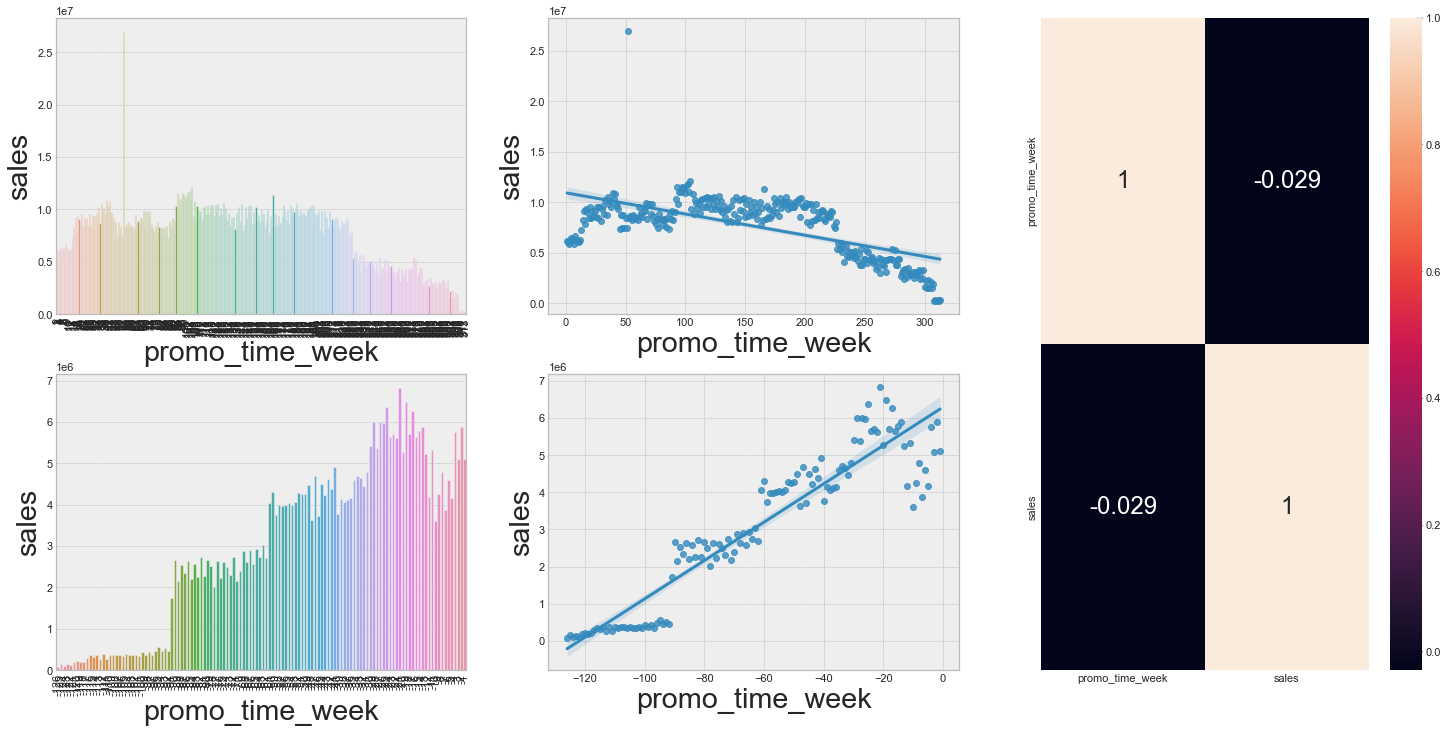

In [39]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

grid = GridSpec( 2, 3)

plt.subplot( grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendido
sns.barplot(x='promo_time_week', y='sales', data = aux2) ; 
plt.xticks( rotation=90);

plt.subplot( grid[0,1])
sns.regplot(x='promo_time_week', y='sales', data = aux2) ; 


plt.subplot( grid[1,0])
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo regular
sns.barplot(x='promo_time_week', y='sales', data = aux3) ; 
plt.xticks( rotation=90);

plt.subplot( grid[1,1])
sns.regplot(x='promo_time_week', y='sales', data = aux3) ; 

plt.subplot( grid[:,2])
sns.heatmap(aux1.corr(method='pearson'), annot = True );

### <s>**H5.** Lojas com mais dias de promoção deveriam vender mais.</s>


### **H6.** Lojas com mais promoções consecutivas deveriam vender mais.
**FALSA** Lojas com mais promocoes consecutivas vendem menos

In [40]:
df4[['promo','promo2', 'sales']].groupby(['promo','promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


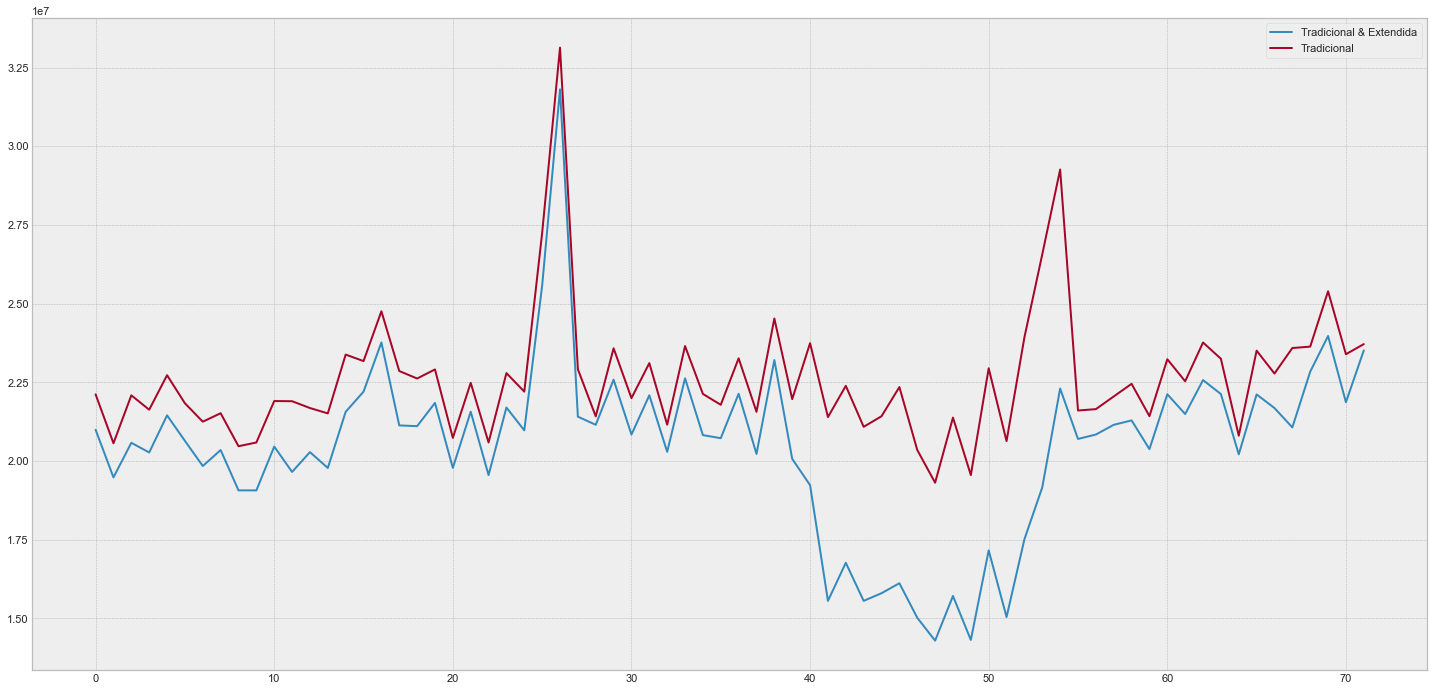

In [41]:
#participou dos dois periodos promocionais
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

#participou apenas do período promocional tradicional
aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['Tradicional & Extendida','Tradicional'])

In [42]:
**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

SyntaxError: invalid syntax (Temp/ipykernel_2948/4133945019.py, line 1)

### **H7.** Lojas abertas durante o feriado de Natal deveriam vender mais.
**FALSA** Lojas abertas durante o feriado do natal vendem menos.

In [ ]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt,subplot(1,2,1)
aux1 = df4[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot( x='state_holiday', y='sales',data=aux1);

plt,subplot(1,2,2)
aux2 = aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot( x='year', y='sales',hue='state_holiday',data=aux2);;

### **H8.** Lojas deveriam vender mais ao longo dos anos.

**FALSA** Lojas vendem menos ao longo dos anos

In [ ]:
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot( x='year', y='sales', data=aux1);

plt.subplot(1,3,2)
sns.regplot( x='year', y='sales', data=aux1);

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot=True);

### **H9.** Lojas deveriam vender mais no segundo semestre do ano.
**FALSA**  Lojas vendem menos no segundo semestre do ano.

In [ ]:
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot( x='month', y='sales', data=aux1);

plt.subplot(1,3,2)
sns.regplot( x='month', y='sales', data=aux1);

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot=True);

### **H10.** Lojas deveriam vender mais depois do dia 10 de cada mês.
**VERDADEIRA** Lojas vendem mais depois do dia 10 de cada mês

In [ ]:
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot( x='day', y='sales', data=aux1);

plt.subplot(2,2,2)
sns.regplot( x='day', y='sales', data=aux1);

plt.subplot(2,2,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot=True);

aux1['before_after'] = aux1[day].apply( lambda x:'before_10_days' if x <= 10 else 'after_10_days' )
aux2 = aux[['before_after', 'sales']].groupby( 'before_after').sum().reset_index()

plt.subplot(2,2,4)
sns.barplot(x='before_after', y = 'sales', data=aux2 );

### **H11.** Lojas deveriam vender menos aos finais de semana.
**VERDADEIRA** Lojas vendem menos nos finais de semana.


In [ ]:
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot( x='day_of_week', y='sales', data=aux1);

plt.subplot(1,3,2)
sns.regplot( x='day_of_week', y='sales', data=aux1);

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot=True);

### **H12.** Lojas deveriam vender menos durante os feriados escolares.
**VERDADEIRA** Lojas vendem menos durante os feriados escolares, exceto os meses de Julho e Agosto.

In [ ]:
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()
plt.subplot( 2,1,1 )
sns.barplot( x='school_holiday', y='sales', data= aux1);

aux2 = df4[['month','school_holiday', 'sales']].groupby(['month','school_holiday']).sum().reset_index()
plt.subplot( 2,1,2 )
sns.barplot( x='month', y='sales',hue='school_holiday' data= aux2);

## 4.3. Análise Multivariada